Devant l’importance de l’angor d’effort comme symptomatologie de la maladie coronarienne, l’épreuve d’effort s’est imposée et demeure un examen de référence. Il s’agit en effet d’un
test relativement sûr et accessible, même pour des médecins
non cardiologues. Il fournit des informations aussi bien diagnostiques que pronostiques


In [138]:
#Importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
df=pd.read_csv('heart.csv')
print(df.shape)
df.head(10)

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


1-âge
2-sexe
3-cp=type de douleur thoracique (4 valeurs)
4-trestbps=tension artérielle au repos
5-chol=cholestérol sérique en mg/dl
6-fbs=glycémie à jeun > 120 mg/dl
7-restecg=résultats électrocardiographiques au repos (valeurs 0,1,2)
8-thalach=fréquence cardiaque maximale atteinte
9-exang	= angine de poitrine induite par l'exercice
10-oldpeak = dépression ST induite par l'exercice par rapport au repos
11-slope=la pente du segment ST d'exercice maximal
12-ca=nombre de vaisseaux principaux (0-3) colorés par fluoroscopie
13-thal : 3 = normal ; 6 = défaut corrigé ; 7 = défaut réversible

In [139]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [141]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [142]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [143]:
df['slope'].value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

In [144]:
df[['slope','target']].value_counts()

slope  target
2      1         107
1      0          91
       1          49
2      0          35
0      0          12
       1           9
dtype: int64

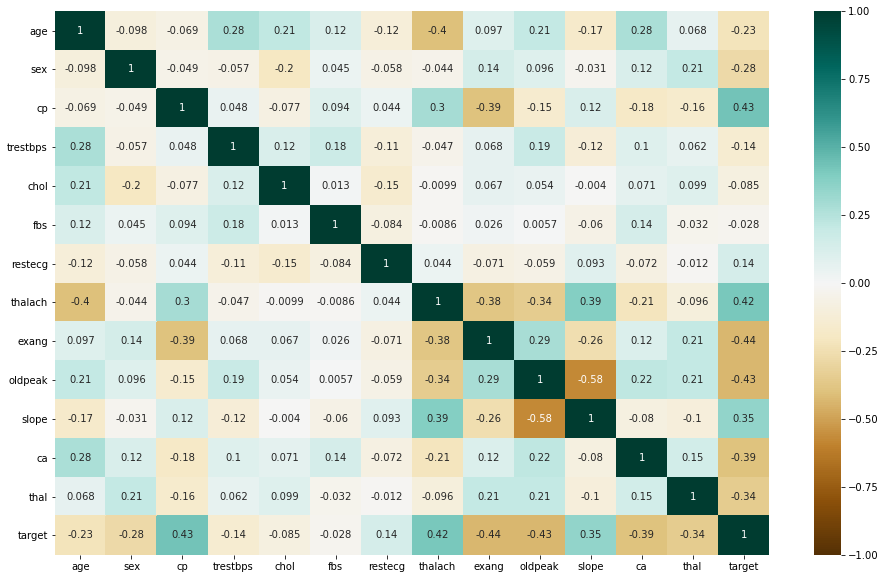

In [145]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure (figsize = (16, 10))
heatmap = sns.heatmap (df.corr (), vmin = -1, vmax = 1, annot = True, cmap = 'BrBG') 

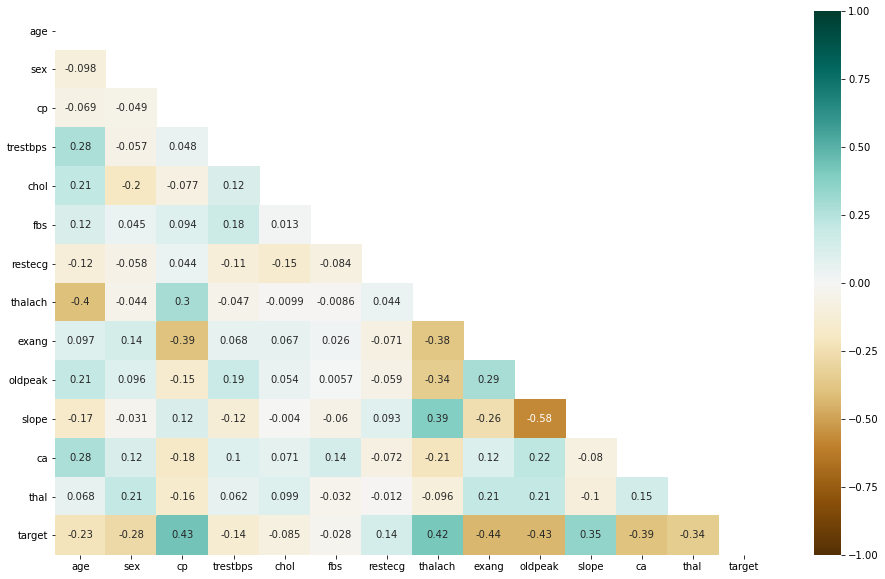

In [146]:
plt.figure (figsize = (16, 10))
mask = np.triu (np.ones_like (df.corr (), dtype = np.bool))
heatmap = sns.heatmap (df.corr (), mask = mask, vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')

on remarque une correlation plus au moins faible au alantour de 0.4% des motifs cp et thalach avec le motif target et entre
le motif slop et thalach

<AxesSubplot:xlabel='thalach', ylabel='slope'>

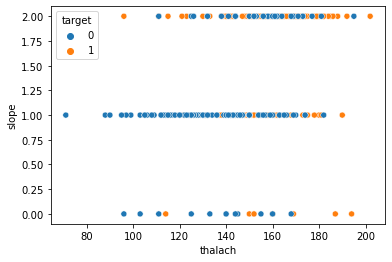

In [147]:
sns.scatterplot(x=df['thalach'], y=df['slope'], hue=df['target'])

<AxesSubplot:xlabel='thalach', ylabel='target'>

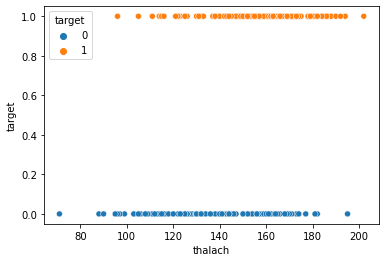

In [148]:
sns.scatterplot(x=df['thalach'], y=df['target'], hue=df['target'])

on remarque une seule correlation significative entre le motif stop et thalach

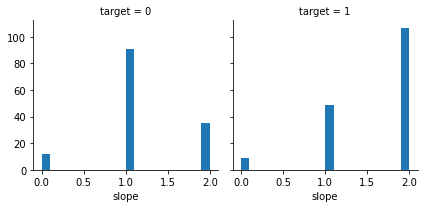

In [149]:
g=sns.FacetGrid(df,col='target')
g.map(plt.hist,'slope',bins=20)

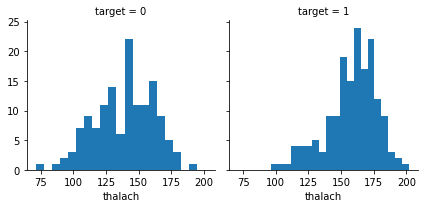

In [150]:
g=sns.FacetGrid(df,col='target')
g.map(plt.hist,'thalach',bins=20)

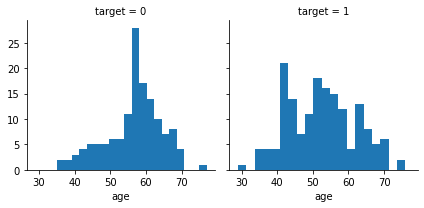

In [151]:
g=sns.FacetGrid(df,col='target')
g.map(plt.hist,'age',bins=20)

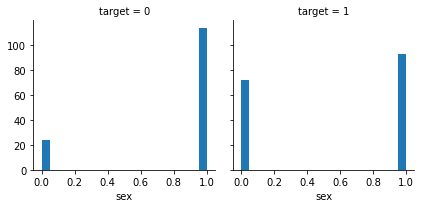

In [152]:
g=sns.FacetGrid(df,col='target')
g.map(plt.hist,'sex',bins=20)

régression logistique

In [153]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.preprocessing import MinMaxScaler
#features extraction

x = df.drop(['target'], axis = 1)
y = df['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)  #splitting data with test size of 25%
feature_scaler = MinMaxScaler()
x_train = feature_scaler.fit_transform(x_train)
x_test = feature_scaler.transform(x_test)
logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.89


<AxesSubplot:xlabel='cp', ylabel='target'>

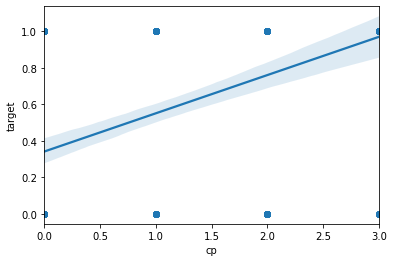

In [154]:
import seaborn as sns
sns.regplot(x='cp',y='target',data=df)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

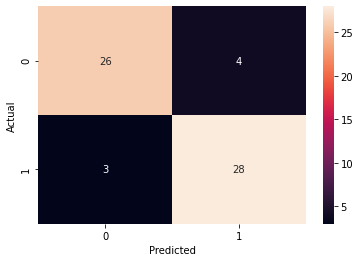

In [155]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

KNN

In [156]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
x = df.drop(['target'], axis = 1)
y = df['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)  #splitting data with test size of 25%
feature_scaler = MinMaxScaler()
x_train = feature_scaler.fit_transform(x_train)
x_test = feature_scaler.transform(x_test)

knn=KNeighborsClassifier(n_neighbors=27) #build our knn classifier
knn.fit(x_train,y_train) #Training KNN classifier
y_pred=knn.predict(x_test)  #Testing
print('Acuuracy=',accuracy_score(y_pred,y_test))


Acuuracy= 0.7704918032786885


Accuracy for k= 1 is: 0.77
Accuracy for k= 2 is: 0.75
Accuracy for k= 3 is: 0.77
Accuracy for k= 4 is: 0.75
Accuracy for k= 5 is: 0.77
Accuracy for k= 6 is: 0.75
Accuracy for k= 7 is: 0.75
Accuracy for k= 8 is: 0.8
Accuracy for k= 9 is: 0.79
Accuracy for k= 10 is: 0.82
Accuracy for k= 11 is: 0.8
Accuracy for k= 12 is: 0.8
Accuracy for k= 13 is: 0.77
Accuracy for k= 14 is: 0.8
Accuracy for k= 15 is: 0.77
Accuracy for k= 16 is: 0.8
Accuracy for k= 17 is: 0.8
Accuracy for k= 18 is: 0.82
Accuracy for k= 19 is: 0.79
Accuracy for k= 20 is: 0.82
Accuracy for k= 21 is: 0.8
Accuracy for k= 22 is: 0.84
Accuracy for k= 23 is: 0.8
Accuracy for k= 24 is: 0.82
Accuracy for k= 25 is: 0.8
Accuracy for k= 26 is: 0.84
Accuracy for k= 27 is: 0.85
Accuracy for k= 28 is: 0.8
Accuracy for k= 29 is: 0.8


Text(0, 0.5, 'Testing Accuracy')

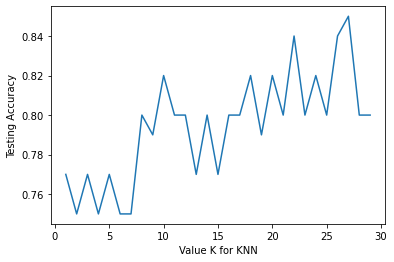

In [157]:
import matplotlib.pyplot as plt
n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))
plt.plot(range(1,30),scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')

In [162]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#features extraction
x = df.drop(['target'], axis = 1)
y = df['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)  #splitting data with test size of 25%
feature_scaler = MinMaxScaler()
x_train = feature_scaler.fit_transform(x_train)
x_test = feature_scaler.transform(x_test)
 

#applying tree algorithm
tree = tree.DecisionTreeClassifier()  
tree.fit(x_train, y_train)   #fitting our model
y_pred=tree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8524590163934426


Random Forest

In [167]:
from sklearn.ensemble import RandomForestClassifier 
clf=RandomForestClassifier(n_estimators=24)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8852459016393442


In [169]:
from sklearn.model_selection import cross_val_score
clf=RandomForestClassifier(n_estimators=25)
score=cross_val_score (clf,x_train, y_train,cv=20)
print("Accuracy:", score) 
print("Accuracy:", score.mean())

Accuracy: [0.92307692 1.         0.66666667 0.83333333 0.91666667 0.58333333
 0.66666667 0.83333333 0.75       0.91666667 0.83333333 0.66666667
 0.75       0.91666667 0.83333333 0.83333333 0.75       0.75
 0.83333333 0.75      ]
Accuracy: 0.8003205128205128


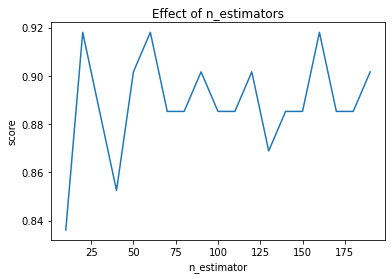

In [165]:
estimators = np.arange(10, 200, 10) 
scores = [] 
for n in estimators:   
    clf.set_params(n_estimators=n)   
    clf.fit(x_train, y_train)    
    scores.append(clf.score(x_test, y_test)) 
plt.title("Effect of n_estimators") 
plt.xlabel("n_estimator") 
plt.ylabel("score") 
plt.plot(estimators, scores)